In [1]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
import bokeh
import bokeh.io
import iqplot
bokeh.io.output_notebook()
#suppress warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
root = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"

#import data /Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/external data/Garg et al 2023/GSE217953_RAW/GSM6586679_WT_4HR_by_WT_0HR_DESeq2.xlsx
#then insteda of 4HR it is 8HR and 12HR and 24HR and 36HR and 48HR. Import all of these into a list of dfs
list_of_dfs = []
for i,j in zip([79,80,81,82,83,84],[4,8,12,24,36,48]):
    df = pd.read_excel(root + "external data/Garg et al 2023/GSE217953_RAW/GSM65866{}_WT_{}HR_by_WT_0HR_DESeq2.xlsx".format(i,j))
    list_of_dfs.append(df)

    
#

    
 

Loading BokehJS ...

In [2]:
import pandas as pd
import seaborn as sns

def plot_log2foldchange(gene_name,axs):
    """
    
    Creates a bar plot of the log2FoldChange values for a given gene across all timepoints
    
    Parameters
    ----------
    gene_name : str
        Name of the gene of interest
    """
    
    
    new_df = pd.DataFrame()
    
    # Include all rows for the given gene and create a column for timepoint
    for i in range(0,6):
        df = list_of_dfs[i]
        df = df[df['Common Name'] == gene_name]
        df['timepoint'] = str([4,8,12,24,36,48][i]) + 'HR'
        df['significance'] = df['padj'] < 0.05
        new_df = new_df.append(df)
    #plot to be small
    
    # Create the bar plot
    axs.bar(new_df['timepoint'], new_df['log2FoldChange'], color=new_df['significance'].map({True: 'red', False: 'blue'}))
    #title in italic and larger
    axs.set_title(gene_name, fontdict={'fontsize': 30, 'fontweight': 'medium', 'fontfamily': 'arial', 'style': 'italic'})
    #y ax from -1 to 5
    axs.set_ylim(-1,5)
    #larger ticks
    axs.tick_params(axis='both', which='major', labelsize=18)
    #rotate x ticks
    axs.tick_params(axis='x', rotation=45)
    #name y axis log2FoldChange
    axs.set_ylabel('log2FoldChange', fontdict={'fontsize': 22, 'fontweight': 'medium', 'fontfamily': 'arial'})
    #have black line at 0
    axs.axhline(y=0, color='black', linestyle='--')
    

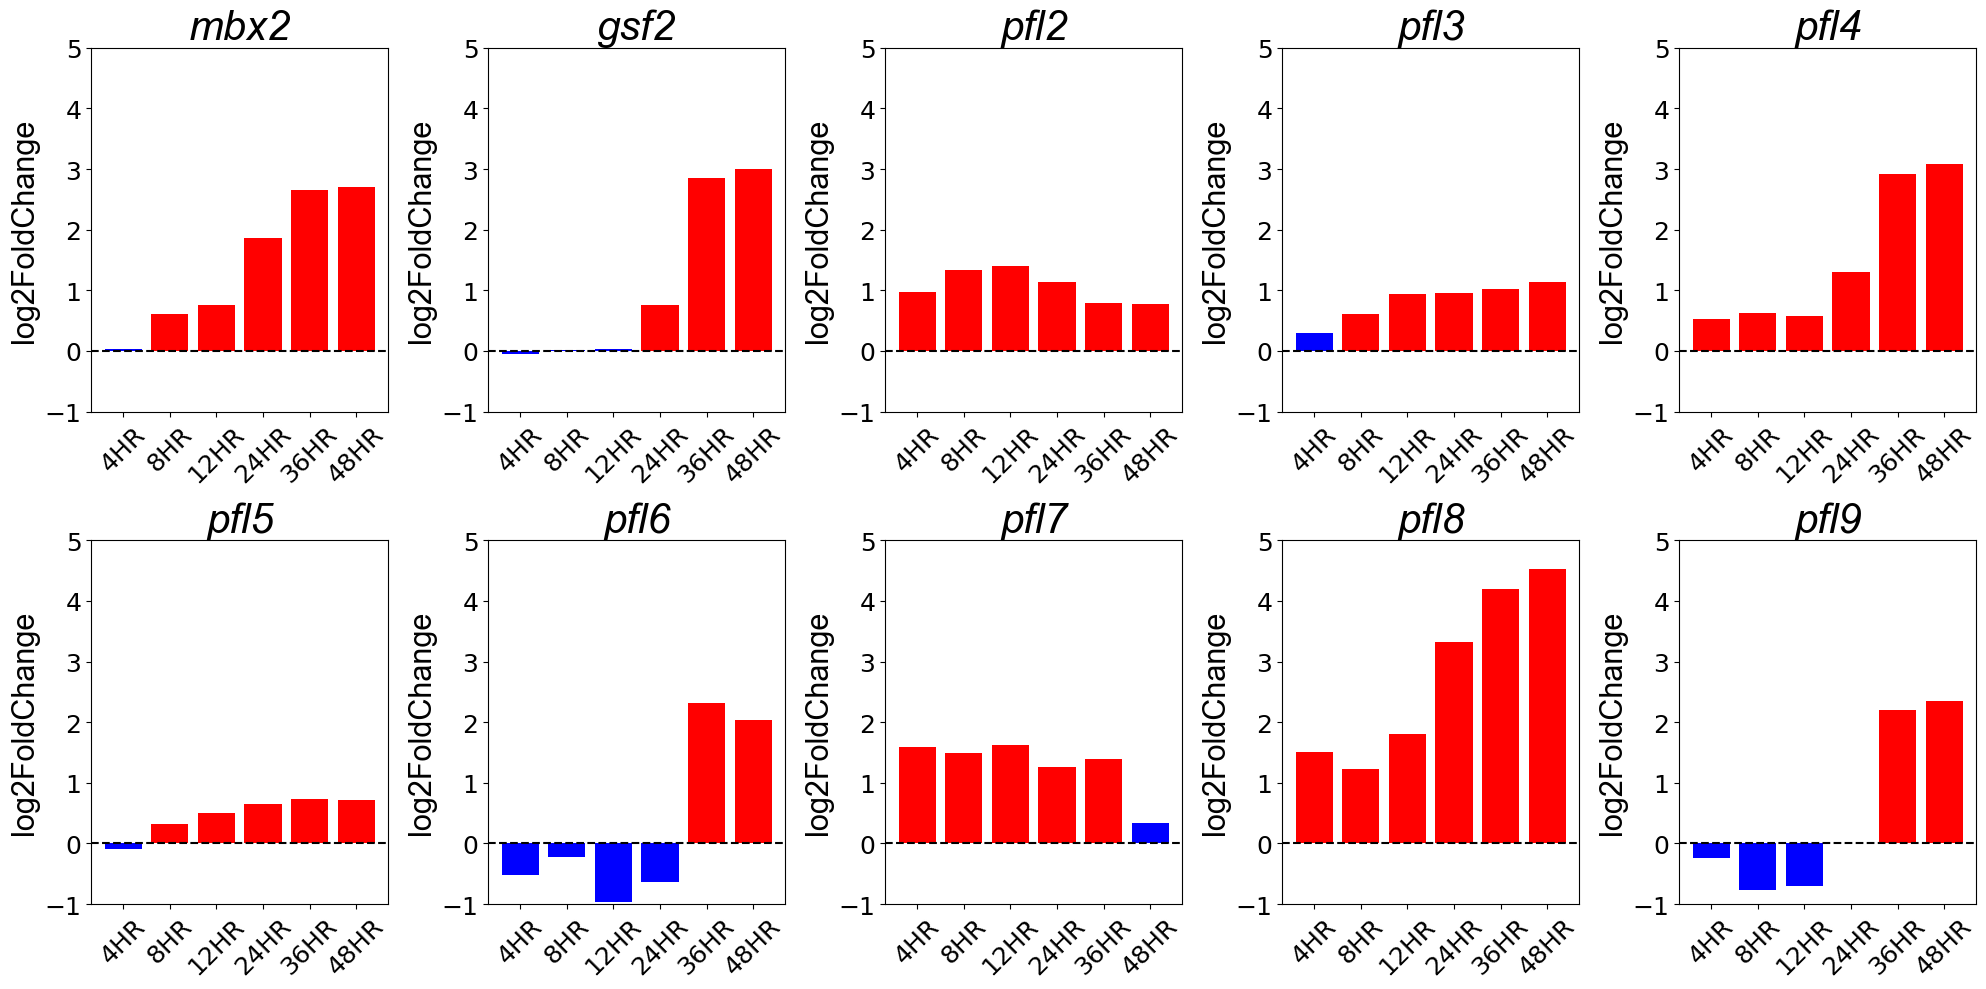

In [3]:
#for a list of genes mbx2, gsf2, pfl2,pfl3,pfl4,pfl5,pfl6,pfl7,pfl8,pfl9 create these plots on in
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i,gene in enumerate(['mbx2', 'gsf2', 'pfl2','pfl3','pfl4','pfl5','pfl6','pfl7','pfl8','pfl9']):
    plot_log2foldchange(gene,axs[i//5,i%5])
plt.tight_layout()


plt.savefig(root + "Figures/All figures/flocculins_under_phos_starv.svg", format="svg", dpi=400)
#as png
plt.savefig(root + "Figures/All figures/flocculins_under_phos_starv.png", format="png", dpi=400)

    

In [4]:
%load_ext watermark
%watermark


Last updated: 2023-11-04T15:30:46.166978+00:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.31.1

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [5]:
%watermark --iversions



scipy     : 1.11.3
seaborn   : 0.13.0
bokeh     : 3.2.2
matplotlib: 3.8.0
pandas    : 1.4.4
iqplot    : 0.3.3
numpy     : 1.23.4

